# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [1]:
from scipy.stats import bernoulli
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [3]:
# your code here

p = 60/100 #Probabilidad de que sea una manzana
q = 40/100 #Probailidad de que sea una naranja

In [4]:
print(f'Probability apple: {p}')
print(f'Probability orange: {q}')

Probability apple: 0.6
Probability orange: 0.4


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [5]:
# Probability 5 apples:
prob_5 = p **5
print(f'Probability of 5 apples: {prob_5}')

#Probability 5 apples + 15 oranges:

prob_5_15 = prob_5 * q**15
print(f'Probability of 5 apples and 15 oranges: {prob_5_15}')


Probability of 5 apples: 0.07775999999999998
Probability of 5 apples and 15 oranges: 8.349416423424006e-08


In [6]:
# your code here
apple_bernoulli = bernoulli(p)
orange_bernoulli = bernoulli(q)

In [7]:
apple_bernoulli.rvs(size = 20) # with this we create 20 events of taking apples out of our basket.

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

<AxesSubplot:ylabel='count'>

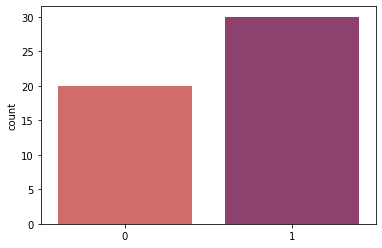

In [8]:
sns.countplot(x = apple_bernoulli.rvs(size = 50), palette = 'flare')

## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [9]:
from scipy.stats import binom

In [10]:
# your code here
p_apple = 5/20
p_orange = 15/20
N = 20

In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

$$P(X=k)={N \choose k} p^{k}(1-p)^{N-k}$$


$${N \choose k} \equiv \frac{N!}{k!(N-k)!}$$

**N = 20**

**k = 5**

$$P(X=5)={20 \choose 5} p^{5}(1-0.25)^{20-5}$$

**P(X=5) = 0.19**

The same but applying the python pmf method:

In [11]:
# your code here
# Please label the axes and give a title to the plot 
apple_binomial = binom(N, p_apple)
orange_binomial = binom(N, p_orange)

In [19]:
a = apple_binomial.pmf(5) #probabilidad de que salgan 5 manzanas
o = orange_binomial.pmf(15) #probabilidad de que salgan 15 naranjas


print(f'Probability of 5 apples: {a}')
print(f'Probability of 5 apples and 15 oranges: {o}')

Probability of 5 apples: 0.2023311518569235
Probability of 5 apples and 15 oranges: 0.2023311518569235


In [22]:
z = a * o
print(f'The probability to take 5 apples and 15 oranges is {z}')

The probability to take 5 apples and 15 oranges is 0.04093789501174944


**Let's play the game but see it visually.**

<AxesSubplot:ylabel='count'>

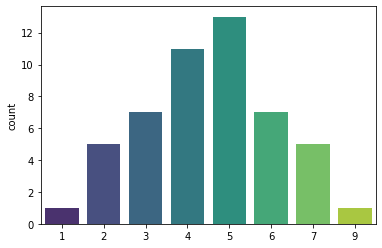

In [27]:
sns.countplot(x = apple_binomial.rvs(size = 50), palette = 'viridis')

**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

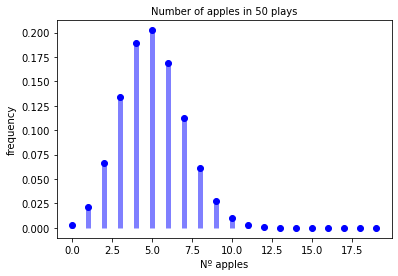

In [30]:
x = np.arange(0,20)
fig, ax = plt.subplots(1, 1)
ax.plot(x, apple_binomial.pmf(x), 'bo')
ax.vlines(x, 0, apple_binomial.pmf(x), colors='b', lw=5, alpha=0.5)
plt.title('Number of apples in 50 plays', size=10)
plt.xlabel('Nº apples')
plt.ylabel('frequency')
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

The probability of a certain event occurring K times is defined by:

$$P(X=k)=\frac{\lambda ^{k}e^{-\lambda }}{k!}$$. 

k = 5

lambda = 2.3

To calculate the probability in this exercise, let's unpack the formula

In [4]:
mu = 2.3
n = 5

**1- k! = 120**

In [3]:
z = math.factorial(5)

**2- $P(X=k)={\lambda ^{k}e^{-\lambda }}$**

${\lambda ^{k}}$  = 64.363

${e^{-\lambda }}$ = 0.1

In [5]:
x = round((mu ** n),3)
x

64.363

In [6]:
y = round(math.exp(-mu),3)
y

0.1

**3- Total probability**

In [7]:
P = (x*y)/z
P

0.053635833333333334

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

In [8]:
# your code here
# Please label the axes and give a title to the plot 
football_poisson = poisson(mu = 2.3)

In [9]:
sample = football_poisson.rvs(size = 100)

<AxesSubplot:ylabel='count'>

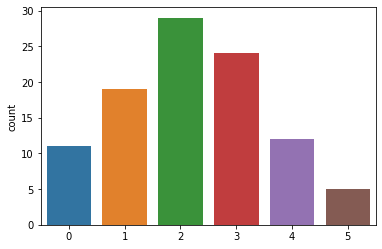

In [10]:
sns.countplot(x = sample)

In [11]:
football_poisson.pmf(5)

0.053775025581946814

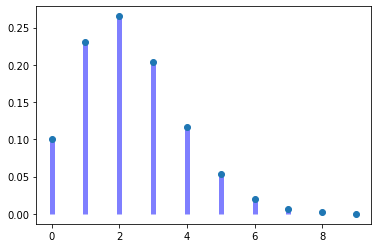

In [13]:
x = np.arange(0,10)
fig, ax = plt.subplots(1, 1)
ax.plot(x, football_poisson.pmf(x), 'o')
ax.vlines(x, 0, football_poisson.pmf(x), colors='b', lw=5, alpha=0.5)